In [1]:
from sf_runoff import daily_climatology, spatial_avg_daily_input
from nested_CV import SVR_nested_CV_gridsearch, SVR_PCA_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

import os

import pdb
import seaborn as sns

path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
# ## Feature selection
daily_input = pd.read_csv(path+'SAN_BENIGNO_ORCO_2002_2019.csv', index_col=0, parse_dates=True)

daily_input_TPE = spatial_avg_daily_input(daily_input)


In [2]:
#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-2, 2, 10)
epsilon_range=np.logspace(-6, -2, 10)
n_range = [17, 50, 200]
components_range = [36]
#do not enlarge t_range for now
t_range=[12]
n_splits=5
test_size=365

### TRAIN A PCA+SVR MODEL 

Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits



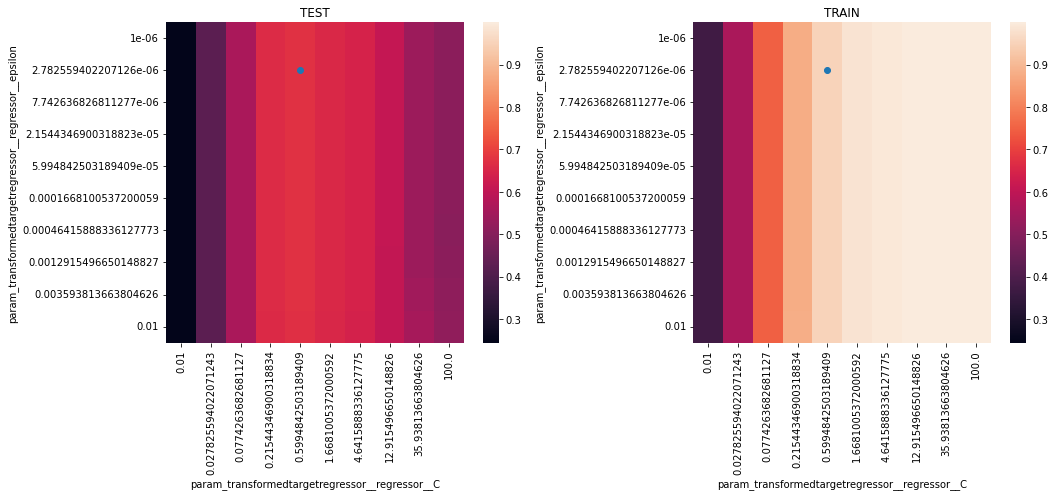

In [5]:
C2,eps2,n2=SVR_PCA_nested_CV_gridsearch(daily_input, C_range,  epsilon_range, components_range, t_range,n_splits,test_size)
print(f'C={C2}')
print(f'epsilon={eps2}')
print(f'n={n2}')

In [3]:
C2  =0.5994842503189409
eps2=2.782559402207126e-06
n2  =36

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [4]:
radius_for_ensemble = 1
predictions = nested_CV_PCA_SVR_predict(daily_input, C2, eps2, n2, 12, n_splits, test_size, radius_for_ensemble)

In [ ]:
predictions=pd.read_csv('tial.csv',date_parser=True)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

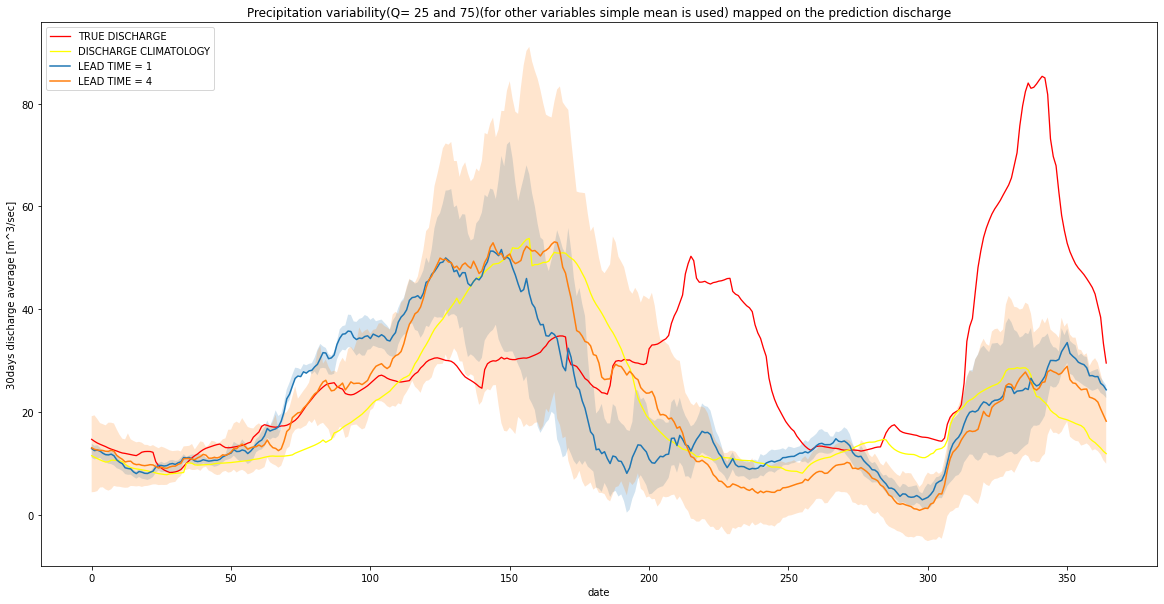

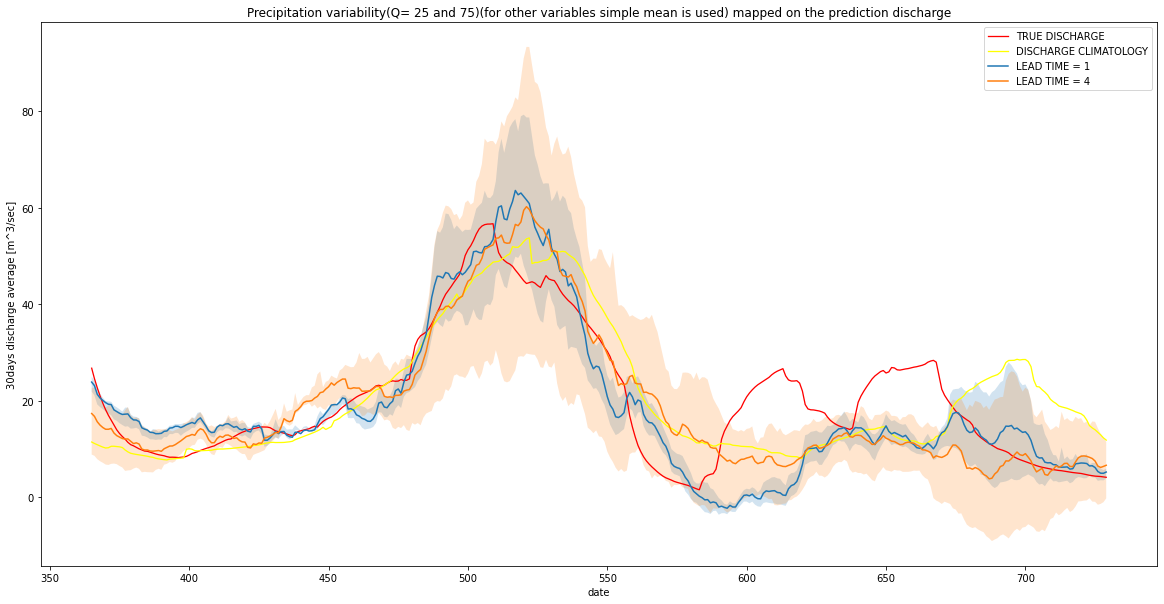

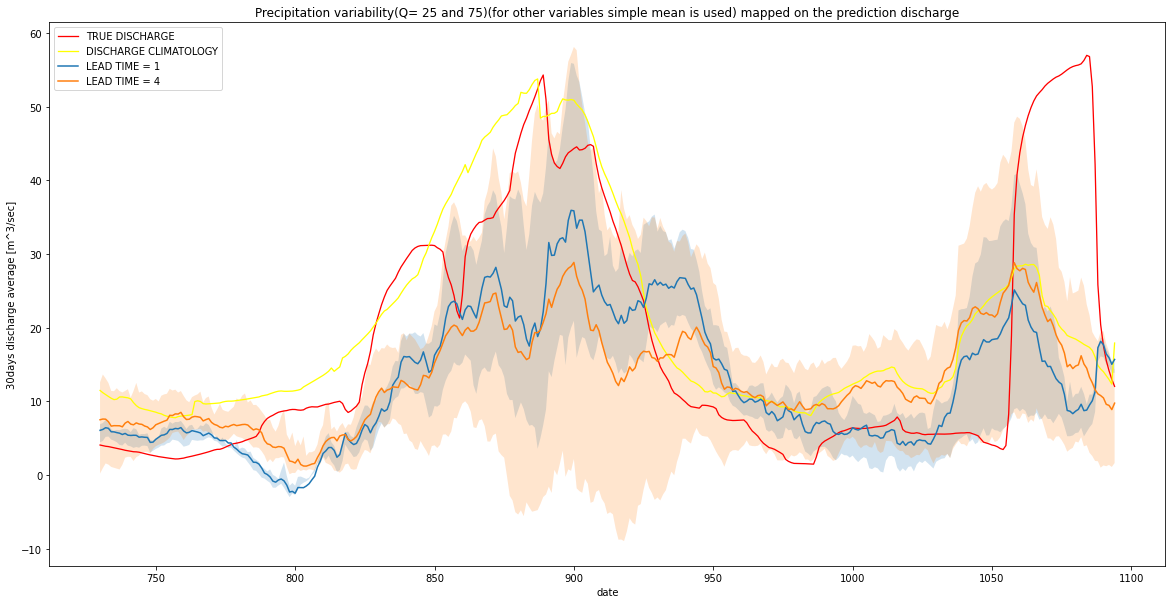

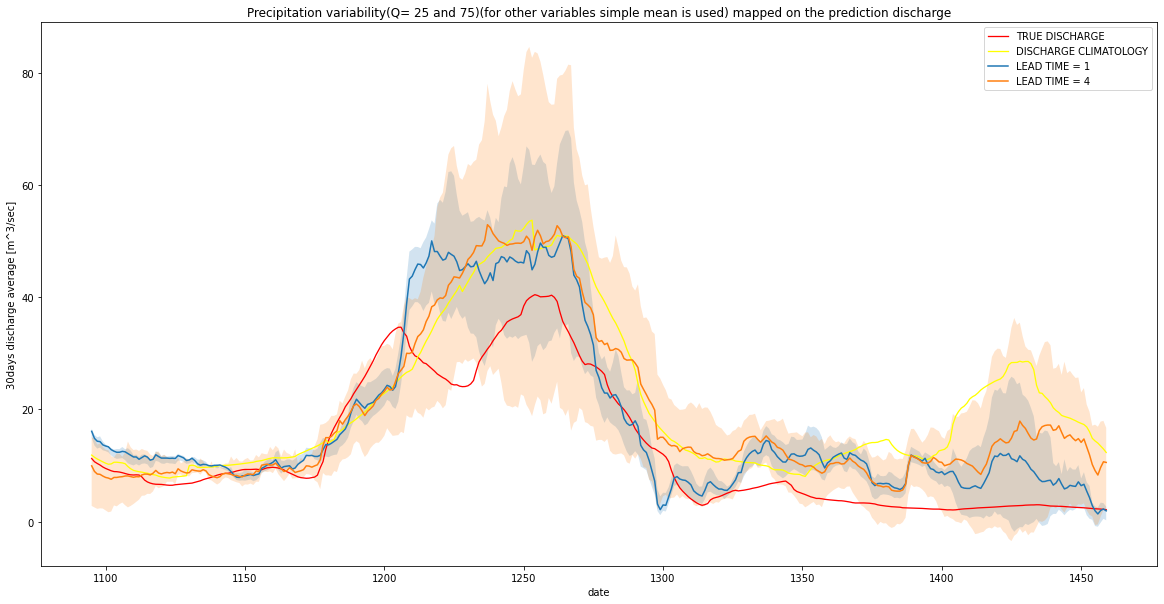

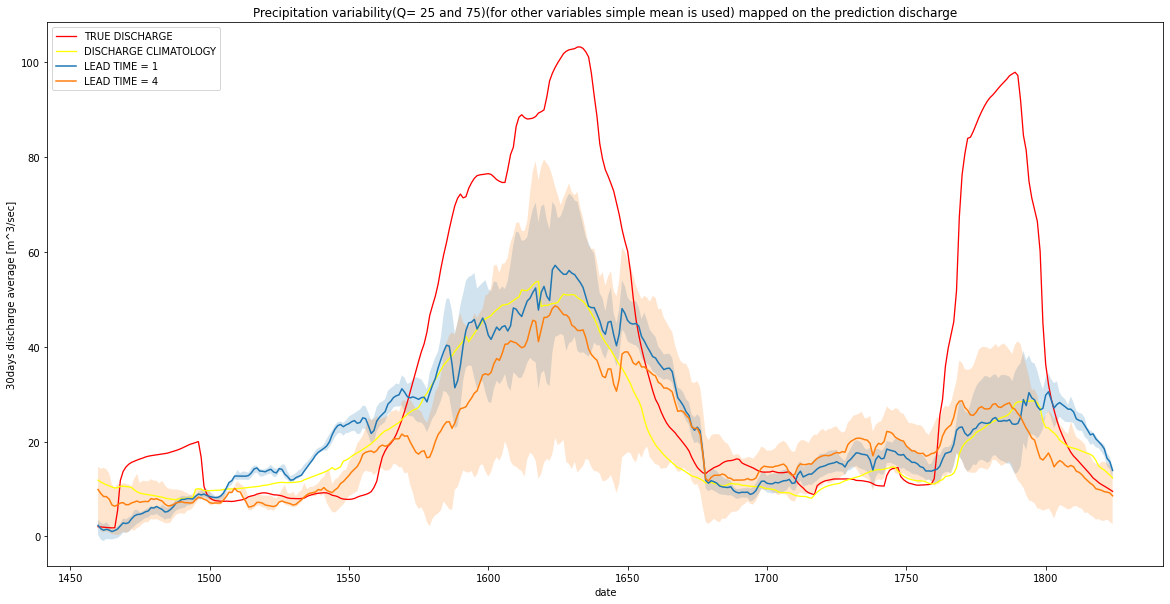

In [5]:
plot_prediction(predictions)

In [9]:
predictions.iloc[:,1:]

,true_runoff,runoff_clim,trueTP,climTP_lt1,climTP_lt1_Q25,climTP_lt1_Q75,split,climTP_lt2,climTP_lt2_Q25,climTP_lt2_Q75,climTP_lt3,climTP_lt3_Q25,climTP_lt3_Q75,climTP_lt4,climTP_lt4_Q25,climTP_lt4_Q75,climTP_lt5,climTP_lt5_Q25,climTP_lt5_Q75
0,14.638333,11.463381,14.085947,12.835991,11.075262,13.809869,0,13.904654,7.380427,19.013562,12.674308,5.018636,18.463811,12.999920,4.339191,19.137605,13.562680,4.030426,20.760754
1,14.258333,11.157405,13.932208,12.451968,10.726955,13.379275,0,13.322461,7.173886,18.273221,13.008979,5.719537,18.574831,12.696456,4.387010,19.314137,13.318924,4.229610,20.980405
2,13.933667,10.894286,14.098565,12.544711,10.921589,13.501490,0,13.072677,7.412856,17.617364,13.000494,5.969858,18.246172,12.563912,4.565059,18.618292,13.732793,4.712121,21.138961
3,13.678667,10.647333,14.650772,12.348823,11.037760,13.011284,0,12.828842,8.198830,16.048100,13.045222,6.549188,17.835501,12.494634,5.257110,17.805370,14.591240,5.779570,21.574370
4,13.453667,10.406071,14.187068,11.937903,10.562084,12.411454,0,12.182776,7.744774,15.532211,12.764602,6.250998,17.416197,12.480848,5.314182,17.598407,14.200930,5.593398,20.637632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,10.953667,14.373644,18.041283,19.317760,17.777856,19.806493,4,8.122913,1.816223,13.341980,8.853097,2.484387,14.615059,9.741061,3.321018,15.730394,12.293706,4.378403,19.803136
1821,10.617000,13.998000,17.246985,18.481892,16.956190,19.306022,4,8.699864,2.324133,14.219306,8.610282,2.555224,14.574845,9.434906,3.294491,15.728875,11.762312,4.312504,19.999709
1822,10.263667,13.475622,15.194121,16.481058,14.793266,17.583514,4,11.248360,4.857950,16.792043,8.456423,2.730973,14.206983,9.342243,3.558295,15.434893,11.119386,4.311824,18.767020
1823,9.892000,12.949422,14.765453,15.741593,14.177588,16.701610,4,10.870631,4.517382,15.941591,7.990554,2.206267,13.334866,9.167593,3.098860,14.953553,10.224899,3.388932,17.048741


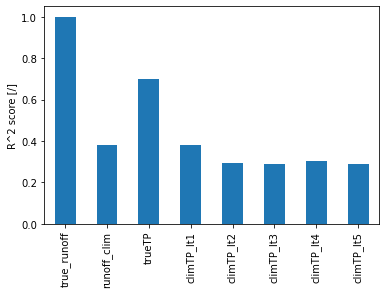

In [10]:
#r2_PCA = evaluate_prediction(predictions)
r2_PCA = evaluate_prediction(predictions.iloc[:,1:])

### TRAIN A TPE MODEL
This model has uses the spatially averaged variables as input

Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits

C=0.5994842503189409
epsilon=2.782559402207126e-06


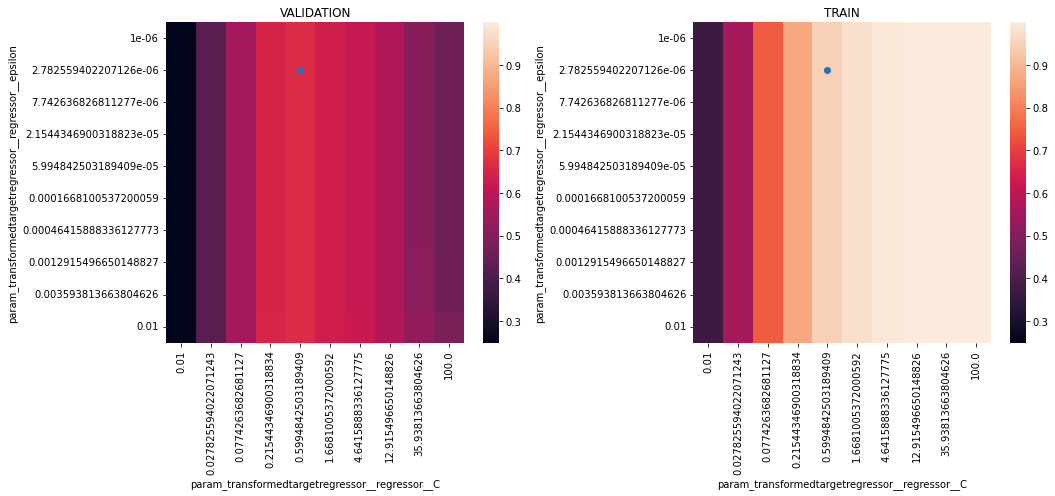

In [11]:
C, eps =SVR_nested_CV_gridsearch(daily_input_TPE, C_range,epsilon_range, t_range,n_splits,test_size)
print(f'C={C}')
print(f'epsilon={eps}')

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [12]:
radius_for_ensemble = 1
predictions = nested_CV_PCA_SVR_predict(daily_input, C2, eps2, n2, 12, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

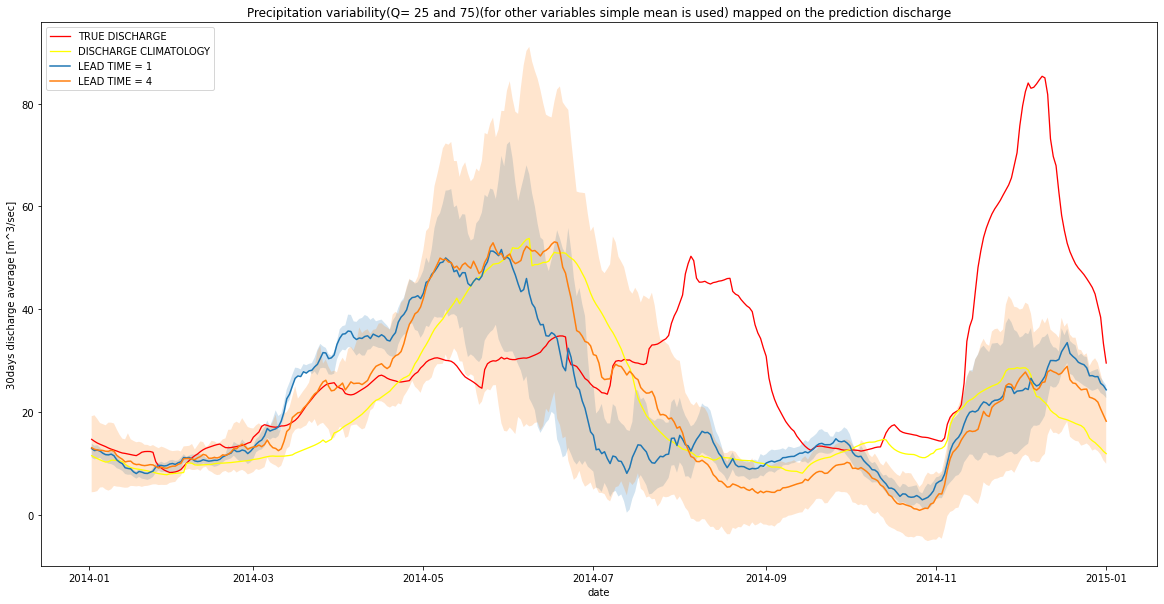

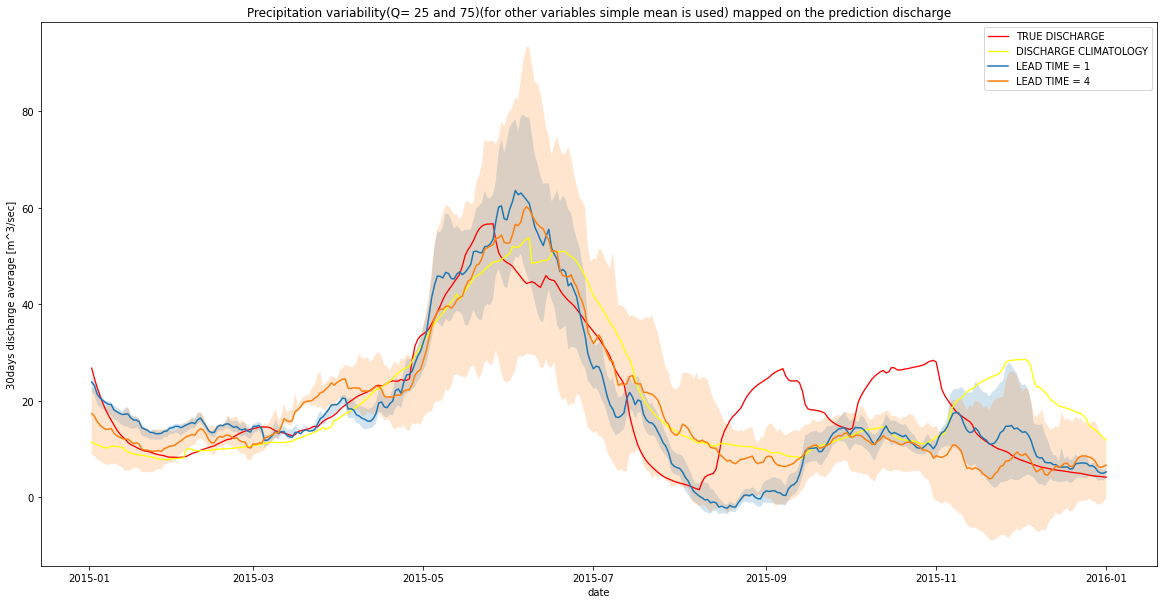

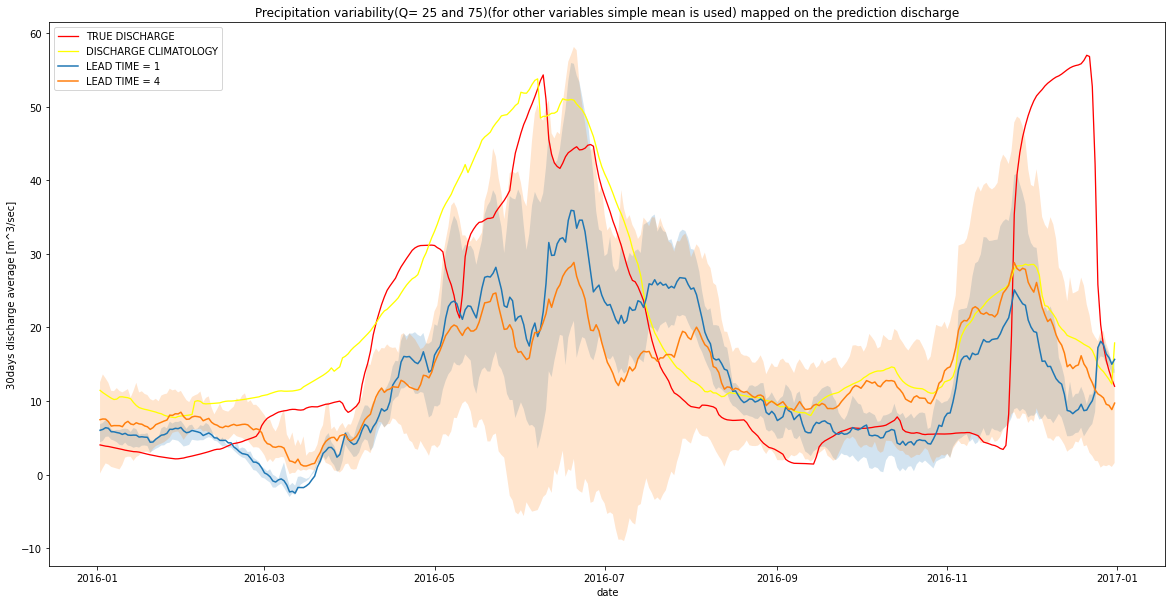

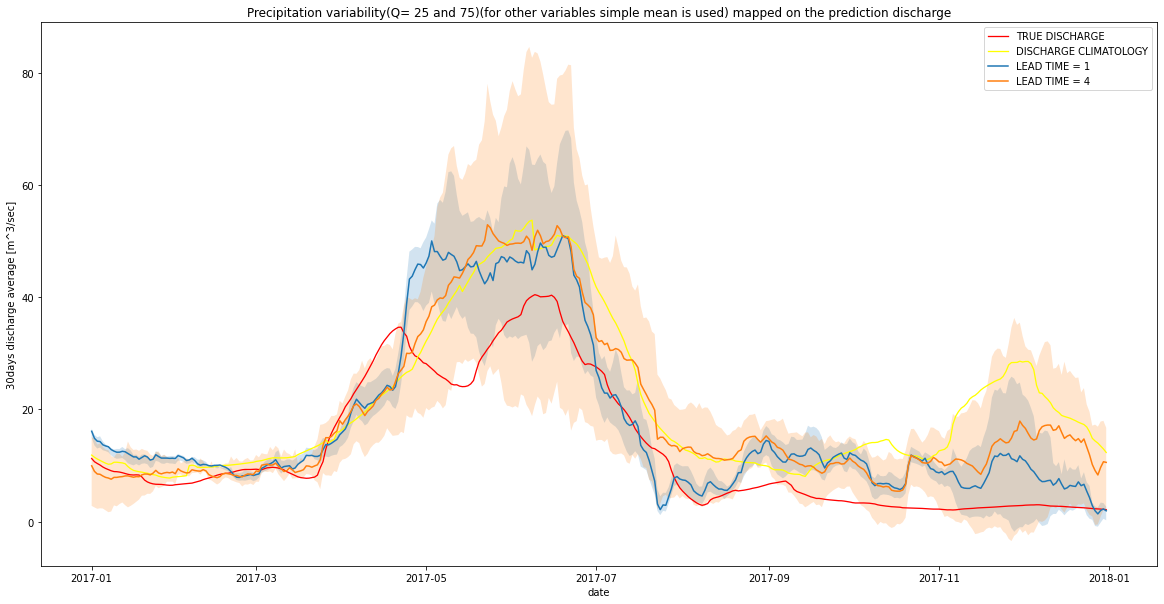

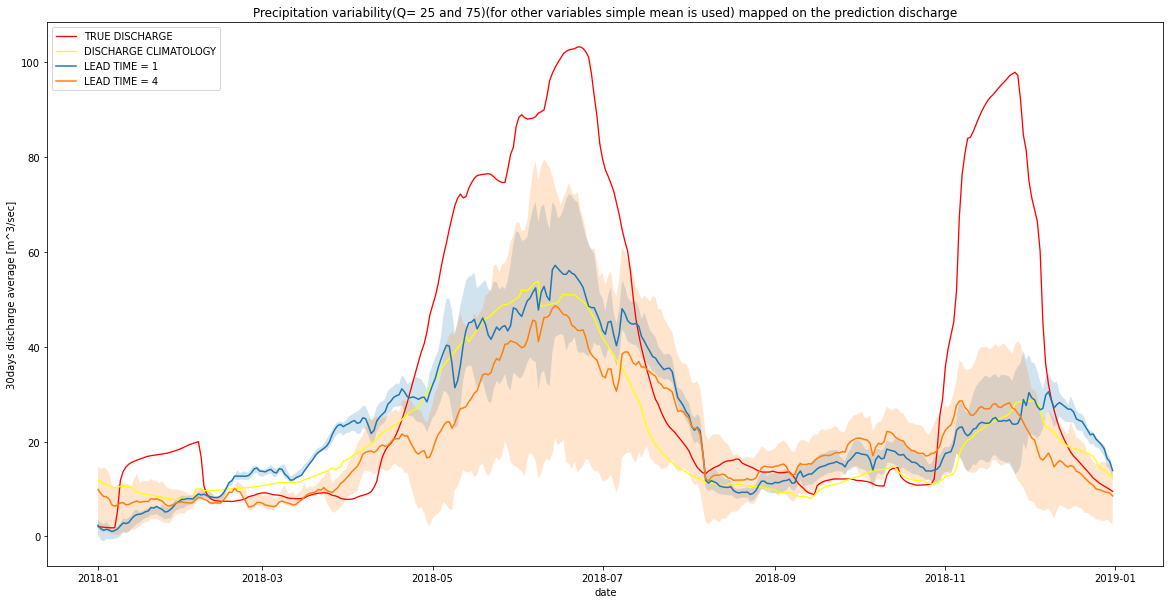

In [13]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)

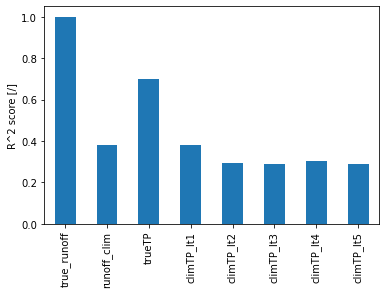

In [14]:
r2_TPE = evaluate_prediction(predictions)

In [1]:
r2_TPE 

NameError: name 'r2_TPE' is not defined